In [ ]:
# Inicializacion
t = 0 #generacion

In [ ]:
import math as mt
import random as rd
import numpy as np

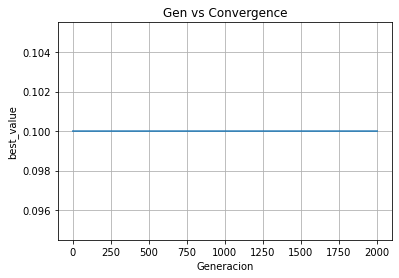

Mínimo de la función: -27.999998773383886
En las coordenadas: (2.00052,0.99978)


In [ ]:
class Agsimple():
    import math as m
    t = 0 #generacion
    #cal_fit = lambda l_x: mt.pow(1.5 - l_x[0]*(1-l_x[1]),2) + mt.pow( 2.25 - l_x[0]*(1-mt.pow(l_x[1],2)) ,2) + mt.pow( 2.625 - l_x[0]*(1-mt.pow(l_x[1],3)) ,2)
    #cal_fit = lambda l_x: mt.pow(l_x[0], 2) + mt.pow(l_x[1], 2) 
    #cal_fit = lambda l_x : l_x[0]**2 + l_x[1]**2 - 8*l_x[0] - 12*l_x[1] + 26
    cal_fit = lambda l_x : l_x[0]**3 + 3*l_x[0]*l_x[1]**2 - 15*l_x[0] - 12*l_x[1]
    #cal_fit = lambda l_x : l_x[0]**4 + l_x[1]**4 -2*( l_x[0] - l_x[1])**2

    def __init__(self, num_ind = 4, num_in = 2):
        import random as rd
        import numpy as np
        population = []
        for _ in range(num_ind):
            population.append([round(rd.uniform(0,20),5),round(rd.uniform(0,30),5)])
        self.population = population

    def rang_in(ind1, ind2):
        if ind1[0] < 0:
            ind1[0] = 0.0
        elif ind1[0] > 20:
            ind1[0] = 20.
        if ind1[1] < 0:
            ind1[1] = 0.0
        elif ind1[1] > 30:
            ind1[1] = 30.

    def evaluate(self):
        import numpy as np
        import math as mt
        inv = lambda x: 1/x
        
        l_ve = []
        l_fitness = list(map(Agsimple.cal_fit , self.population))
        min_f = Agsimple.min_value(l_fitness)
        if min_f < 0:
            l_fitness = Agsimple.is_negative(l_fitness, min_f)
        l_fit_inv = list(map(inv, l_fitness))
        f_prom_inv = sum(l_fit_inv)/len(l_fitness)
        for e in l_fit_inv:
            l_ve.append(e/f_prom_inv)
        return l_fitness , l_ve

    def selection_parents(self):
        import random as rd
        fitness, ve = Agsimple.evaluate(self)
        T = sum(ve)
        parents = []
        n = len(self.population)
        while len(parents) < int((n/2)):
            sel, sel_tem = [] , []
            for _ in range(2):
                ve_sum = 0
                r = rd.uniform(0, round(T))
                for i in range(n):           
                    ve_sum += ve[i]
                    if ve_sum >= r:
                        sel.append(i)
                        break
            sel_tem = sel.copy()
            sel_tem.reverse()
            if sel in parents or sel[0] == sel[1] or sel_tem in parents:
                pass
            else:
                parents.append(sel)
        return parents
    
    def __cal_beta(u,nc):
        import math as mt
        if u<=0.5:
            beta = mt.pow(2*u, 1/(nc+1))
        else: 
            beta = mt.pow(  1/(2*(1-u)) ,  1/(nc+1)  )
        return beta

    def cruza_SBX(self, nc=1):
        import random as rd
        import numpy as np
        parents = self.selection_parents()
        for i in range(len(parents)):
            ind_p1, ind_p2 = parents[i][0], parents[i][1]
            p1, p2 =np.array(self.population[ind_p1]),np.array(self.population[ind_p2])
            u = rd.random()
            beta = Agsimple.__cal_beta(u, nc)
            h1 = 0.5*((p1+p2) - beta*(p2-p1))
            h2 = 0.5*((p1+p2) + beta*(p2-p1))
            #Agsimple.rang_in(h1,h2)
            self.population.append(np.round(h1,5).tolist())
            self.population.append(np.round(h2,5).tolist())
        self.mutation_uniform()
        
    def new_poblation(self):
        import random as rd
        self.cruza_SBX(nc = 20)
        fitness, ve = self.evaluate()
        i = 0
        for e in self.population:
            e.insert(0, fitness[i])
            i +=1
        self.population.sort()
        for i in range(len(self.population)):
            if i <=(len(self.population)/2 -1):
                self.population[i].pop(0)
            else:
                self.population.pop()
        rd.shuffle(self.population)
    
    def mutation_uniform(self):
        import random as rd
        import numpy as np
        x1_min, x1_max, x2_min, x2_max = 0, 20, 0 , 30
        n = len(self.population)
        pm = 1/len(self.population[0])
        for i in range(int(n/2) , n ):
            if rd.uniform(0,1) <= pm:
                pos = rd.randint(0,1)
                if pos == 0:
                    self.population[i][pos] = round(rd.uniform(x1_min,x1_max),5)
                else:
                    self.population[i][pos] = round(rd.uniform(x2_min,x2_max),5)
        '''
        print('mutada')
        for e in self.population:
            print(e)
        
        fitness, ve = self.evaluate()
        ind_fit = min(fitness)
        ind_fit_index = fitness.index(ind_fit)
        ind_best = self.population[ind_fit_index].copy()
        ind_best = np.array(ind_best)
        for i in range(int(n/2) , n ):
            if uniform(0,1) <= pm:
                ind_i = self.population[i].copy()
                ind_i= np.array(ind_i)
                delta = uniform(0,1)*(ind_best - ind_i)
                ind_i_m = ind_i + delta
                ind_i_m = ind_i_m.tolist()
                self.population[i] = ind_i_m
        print('mutada')
        for e in self.population:
            print(e)
        '''
    def graph_convergence(n_t, best_value):
        import matplotlib.pyplot as plt
        plt.plot(n_t, best_value)
        plt.title('Gen vs Convergence')
        plt.xlabel('Generacion')
        plt.ylabel('best_value')
        plt.grid()
        plt.show()

    def min_value(l):
        return min(l)
    
    def is_negative(fitness, min_fit):
        min_fit = abs(min_fit)
        fitness = [min_fit + e +0.1 for e in fitness]
        return fitness

    
    def algorithm_genetive(self, gen =10):
        best_value_list = []
        fitness, ve = self.evaluate()
        best_value_list.append(Agsimple.min_value(fitness))
        while Agsimple.t <= gen:
            self.new_poblation()
            fitness, ve = self.evaluate()
            best_value_list.append(Agsimple.min_value(fitness))
            Agsimple.t +=1
        Agsimple.graph_convergence(range(Agsimple.t + 1), best_value_list )
        #min = Agsimple.min_value(fitness)
        x1,x2 =  self.population[0][0],self.population[0][1]
        min = Agsimple.cal_fit([x1,x2])

        print("Mínimo de la función: {}\nEn las coordenadas: ({},{})".format(min,x1,x2 ))
        return min , [x1,x2]


poblacion = Agsimple(num_ind= 50)
poblacion.algorithm_genetive(gen=2000)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *
from sympy.abc import x
import numpy as np
import random as rd

sp.init_printing()
x1,x2 = sp.symbols('x1 x2')
def gradient(f):
    return [f.diff(x1), f.diff(x2)]

def gradient2(f1):
    return [[(f1[0].diff(x1)), (f1[0].diff(x2))],[(f1[1].diff(x1)),(f1[1].diff(x2))]]

#f = x1**2+x2**2
#f = x1**2 + x2**2 - 8*x1 -12*x2 + 26
#f = (1.5 -x1*(1-x2))**2 + (2.25 -x1*(1-x2**2))**2 + (2.625 -x1*(1-x2**3))**2
f = x1**3 + 3*x1*x2**2-15*x1 -12*x2
#f = x1**4 + x2**4 - 2*(x1-x2)**2
f_eva = lambdify((x1,x2) , f)
print('Funcion : {}'.format(f))
g = gradient(f)


gx = lambdify((x1,x2) , g[0])
gy = lambdify((x1,x2) , g[1])
g2 = gradient2(g)
g2xx = lambdify((x1,x2) , g2[0][0])
g2yy = lambdify((x1,x2) , g2[1][1])
g2xy = lambdify((x1,x2) , g2[0][1])
g2yx = lambdify((x1,x2) , g2[1][0])

epsilon = 0.000001




Funcion : x1**3 + 3*x1*x2**2 - 15*x1 - 12*x2


In [ ]:
k = 0
error = 11
xk = np.array([round(rd.uniform(-20,10),5),round(rd.uniform(-30,10),5)]).reshape(2,1)
while not(error < epsilon):
    g2 = np.array([float(g2xx(xk[0],xk[1])) , float(g2xy(xk[0],xk[1])) , float(g2yx(xk[0],xk[1])) , float(g2yy(xk[0],xk[1]))]).reshape(2,2)
    g2_inv = np.array(np.linalg.inv(g2))
    print('G2 invers:')
    print(g2_inv)
    g_eva1 = float(gx(xk[0],xk[1]))
    g_eva2 = float(gy(xk[0],xk[1]))
    g_eval = np.matrix([g_eva1 ,g_eva2]).T

    print('Gra evaluado')
    print(g_eval)
    xk_pre = xk.copy()
    ajuste = g2_inv*g_eval
    print('Ajuste')
    print(ajuste)
    ajuste.reshape(2,1)
    xk = xk_pre - ajuste
    #error = float(f_eva(xk[0],xk[1])) - float(f_eva(xk_pre[0],xk_pre[1]))
    error = np.linalg.norm(g_eval)
    print('error : {}'.format(error))
    k+=1
    print('Vector xk')
    print(xk)

G2 invers:
[[0.02168532 0.01007293]
 [0.01007293 0.02168532]]
Gra evaluado
[[ 335.30246435]
 [-279.67858211]]
Ajuste
[[ 4.45396002]
 [-2.6874428 ]]
error : 436.63239903252486
Vector xk
[[ 5.34626998]
 [-1.8648072 ]]
G2 invers:
[[0.03549259 0.01238   ]
 [0.01238    0.03549259]]
Gra evaluado
[[ 81.18032588]
 [-71.81857662]]
Ajuste
[[ 1.99218604]
 [-1.54401478]]
error : 108.38889822272567
Vector xk
[[ 3.35408394]
 [-0.32079242]]
G2 invers:
[[0.05014941 0.00479641]
 [0.00479641 0.05014941]]
Gra evaluado
[[ 19.05836061]
 [-18.45578819]]
Ajuste
[[ 0.86724401]
 [-0.83413518]]
error : 26.529930776284417
Vector xk
[[2.48683994]
 [0.51334276]]
G2 invers:
[[ 0.07000231 -0.01445014]
 [-0.01445014  0.07000231]]
Gra evaluado
[[ 4.34368097]
 [-4.34039239]]
Ajuste
[[ 0.36678697]
 [-0.36660428]]
error : 6.14056759776221
Vector xk
[[2.12005297]
 [0.87994704]]
G2 invers:
[[ 0.09497634 -0.03942078]
 [-0.03942078  0.09497634]]
Gra evaluado
[[ 0.80679413]
 [-0.80679403]]
Ajuste
[[ 0.1084308]
 [-0.1084308]]


In [ ]:
print(float(f_eva(xk[0],xk[1])))
print(k)

-28.0
8
